In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
import math
from keras.utils import np_utils

from __future__ import print_function

import keras
import keras.callbacks as cb
from keras.datasets import mnist
from keras.layers.core import Activation, Dense, Dropout
from keras.models import Sequential
from keras.optimizers import SGD
from keras.regularizers import l1, l2

import time

from sklearn import preprocessing
import pickle

Using TensorFlow backend.


In [2]:
def filterNoise(peakind,data,channel,offsetNoise):
    ind = []
    noise = np.mean(data[:,channel])
    for i in range(len(peakind)):
        if data[peakind,channel][i] < noise +offsetNoise:
            ind.append(i)
    return ind

def accPeak(peakind,data,channel,rangeThreshold):
    peakindTrue = []
    for j in range(peakind.shape[0]):
        maxvalue = data[peakind[j],channel]
        maxind = peakind[j]
        for k in range(max(-rangeThreshold,-peakind[j]),min(rangeThreshold+1,data.shape[0]-1-peakind[j])):
            if data[peakind[j]+k,channel]>maxvalue:
                maxvalue = data[peakind[j]+k,channel]
                maxind = peakind[j]+k
        peakindTrue.append(maxind)
        
    return peakindTrue

def filterPeck(peakind,data,channel):
    ind = []
    dataPeak = []
    cutNumber = math.ceil(0.1*len(peakind))
    for i in range(len(peakind)):
        dataPeak.append(data[peakind,channel][i])
        
    indexSorted = sorted(enumerate(dataPeak), key=lambda x:x[1])
    for i in range(cutNumber):
        ind.append(indexSorted[i][0])
        ind.append(indexSorted[len(peakind)-1-i][0])
   
    return ind

(9614, 10)


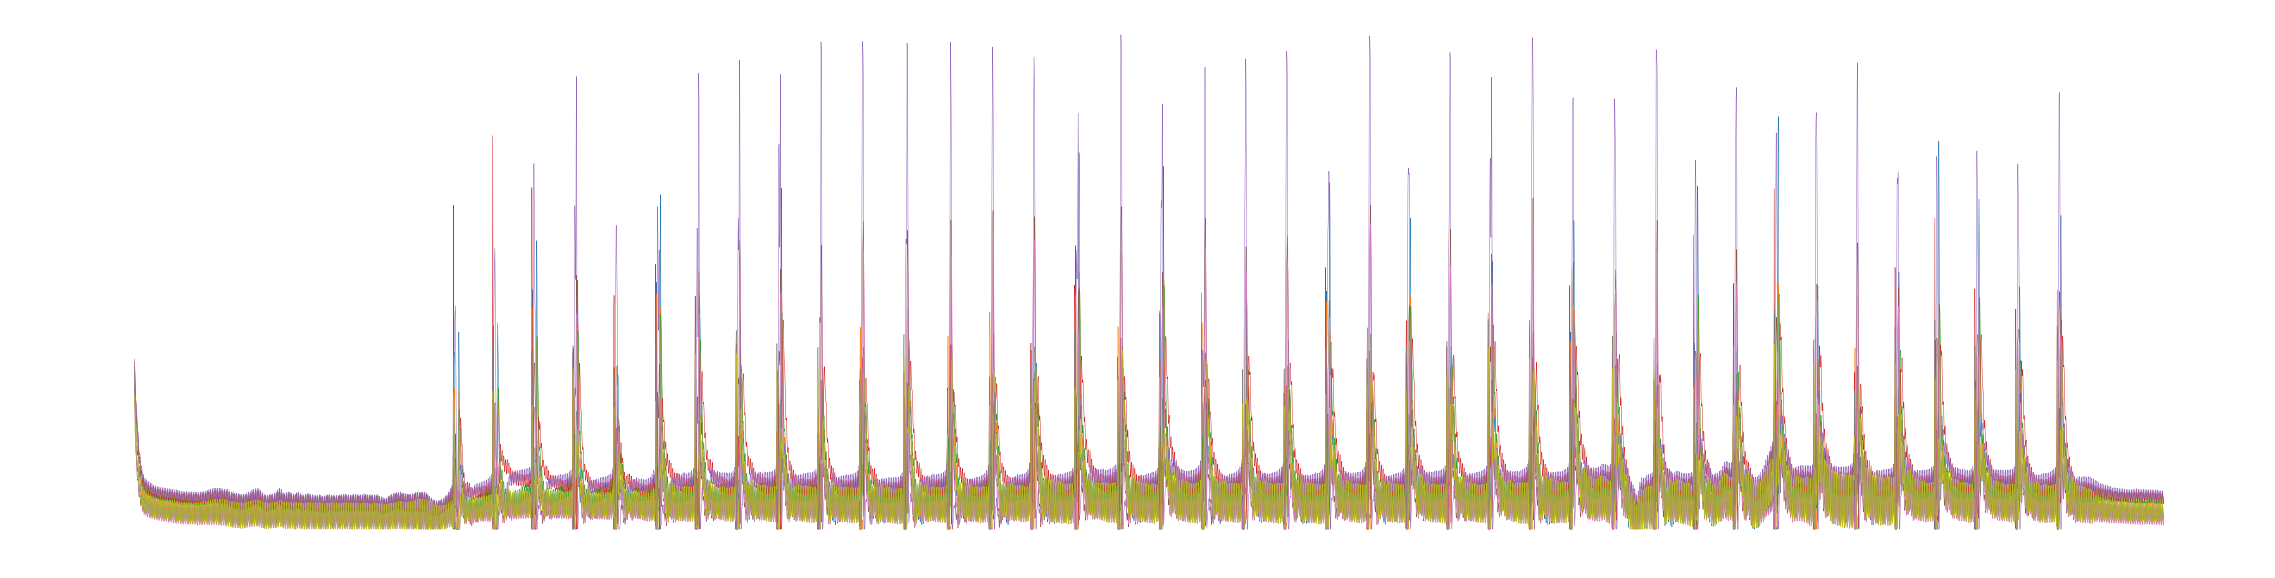

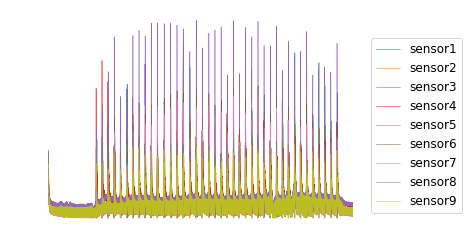

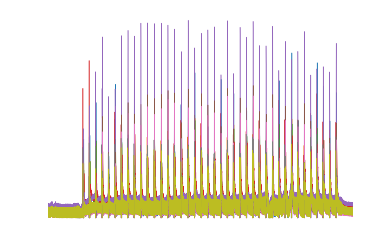

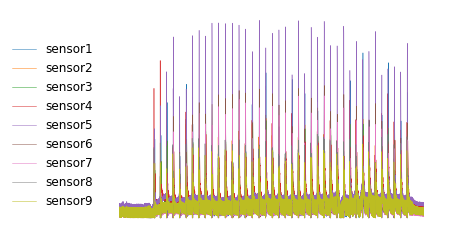

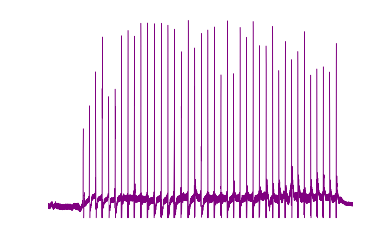

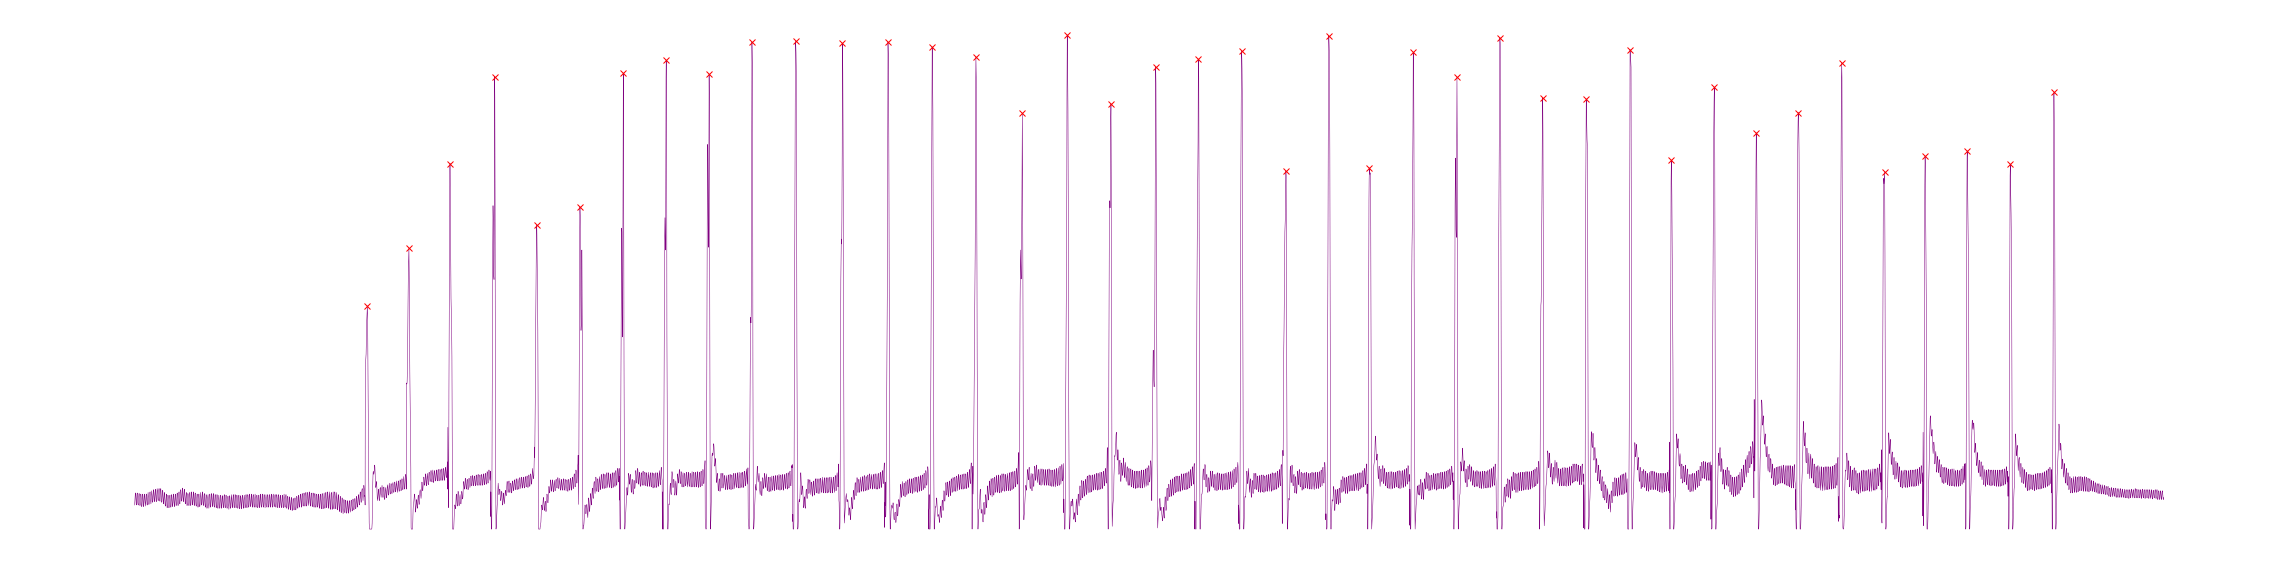

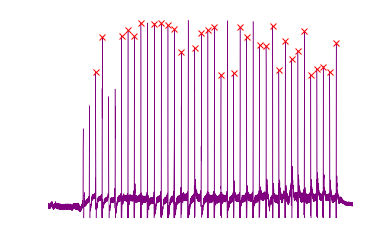

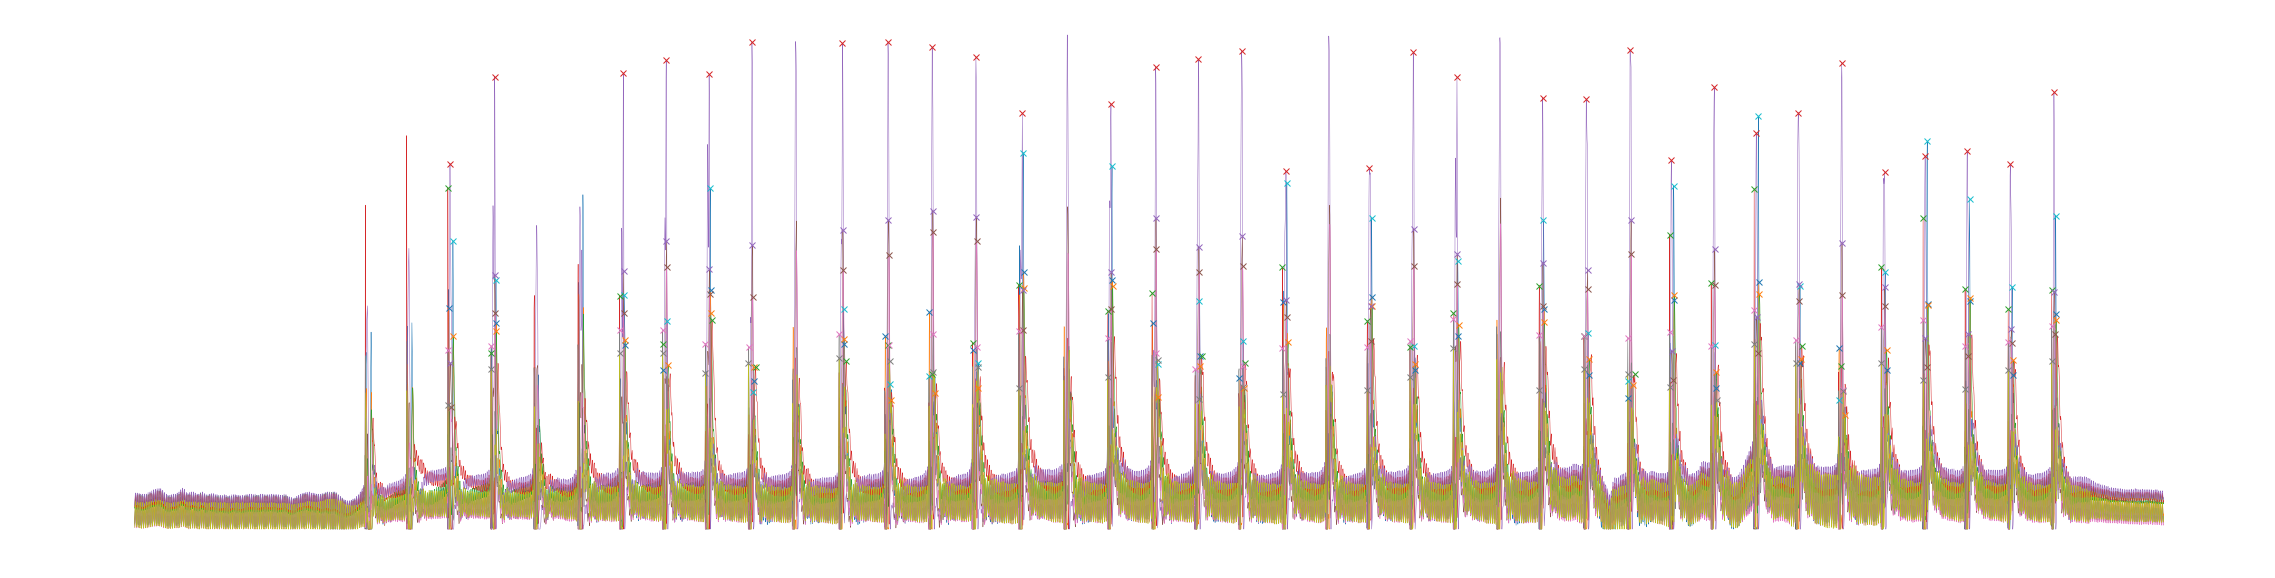

In [3]:
file = "C:\\Users\\PangTouXian\\Desktop\\gao project\\experiment\\train1\\l1f3.txt"
outputname1 = "C:\\Users\\PangTouXian\\Desktop\\gao project\\figure\\21.png"
outputname2 = "C:\\Users\\PangTouXian\\Desktop\\gao project\\figure\\22.png"
outputname3 = "C:\\Users\\PangTouXian\\Desktop\\gao project\\figure\\23.png"
outputname4 = "C:\\Users\\PangTouXian\\Desktop\\gao project\\figure\\24.png"
outputname5 = "C:\\Users\\PangTouXian\\Desktop\\gao project\\figure\\25.png"
outputname6 = "C:\\Users\\PangTouXian\\Desktop\\gao project\\figure\\26.png"
startCutThreshold = 500
rangeThreshold = 80
offsetNoise = 20

list_of_lists = []
with open(file, "r") as f:
    for line in f:
        inner_list = [elt.strip() for elt in line.split('\t')]
        # in alternative, if you need to use the file content as numbers
        # inner_list = [int(elt.strip()) for elt in line.split(',')]
        list_of_lists.append(inner_list)
print(np.shape(list_of_lists))   
(a,b) = np.shape(list_of_lists)
data = np.zeros((a,b))

for x in range(0,a):
    data[x] = list(map(int,list_of_lists[x]))
    
'''raw data1''' 
plt.figure(figsize=(40,10))
plt.plot(data[:,0],data[:,1:],linewidth=0.5)
plt.set_cmap('hot')
plt.axis('off')
plt.savefig(outputname1)
plt.show()

'''raw data2''' 
sensor1, = plt.plot(data[:,0],data[:,1],linewidth=0.5,label='sensor1')
sensor2, = plt.plot(data[:,0],data[:,2],linewidth=0.5,label='sensor2')
sensor3, = plt.plot(data[:,0],data[:,3],linewidth=0.5,label='sensor3')
sensor4, = plt.plot(data[:,0],data[:,4],linewidth=0.5,label='sensor4')
sensor5, = plt.plot(data[:,0],data[:,5],linewidth=0.5,label='sensor5')
sensor6, = plt.plot(data[:,0],data[:,6],linewidth=0.5,label='sensor6')
sensor7, = plt.plot(data[:,0],data[:,7],linewidth=0.5,label='sensor7')
sensor8, = plt.plot(data[:,0],data[:,8],linewidth=0.5,label='sensor8')
sensor9, = plt.plot(data[:,0],data[:,9],linewidth=0.5,label='sensor9')
plt.legend(handles=[sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9])
plt.legend(bbox_to_anchor=(1.3, 0.9), loc=1,fontsize=12) # mode="expand"

plt.set_cmap('hot')
plt.axis('off')
plt.show()

'''cut noise in the begining: 500  --1'''
data = data[startCutThreshold:,:]
plt.plot(data[:,0],data[:,1:],linewidth=0.5)
plt.set_cmap('hot')
plt.axis('off')
plt.savefig(outputname2)
plt.show()

'''cut noise in the begining: 500  --2'''
sensor1, = plt.plot(data[:,0],data[:,1],linewidth=0.5,label='sensor1')
sensor2, = plt.plot(data[:,0],data[:,2],linewidth=0.5,label='sensor2')
sensor3, = plt.plot(data[:,0],data[:,3],linewidth=0.5,label='sensor3')
sensor4, = plt.plot(data[:,0],data[:,4],linewidth=0.5,label='sensor4')
sensor5, = plt.plot(data[:,0],data[:,5],linewidth=0.5,label='sensor5')
sensor6, = plt.plot(data[:,0],data[:,6],linewidth=0.5,label='sensor6')
sensor7, = plt.plot(data[:,0],data[:,7],linewidth=0.5,label='sensor7')
sensor8, = plt.plot(data[:,0],data[:,8],linewidth=0.5,label='sensor8')
sensor9, = plt.plot(data[:,0],data[:,9],linewidth=0.5,label='sensor9')
plt.legend(handles=[sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9])
leg = plt.legend(bbox_to_anchor=(0, 0.9), loc=1,fontsize=12) # mode="expand"
leg.draw_frame(False)


plt.set_cmap('hot')
plt.axis('off')
plt.show()

'''find channel dominate'''
index_max = np.argmax(data[:,1:])
channelDominate = index_max%9+1
plt.plot(data[:,0],data[:,channelDominate],linewidth=0.5,color = 'purple')
plt.set_cmap('hot')
plt.axis('off')
plt.savefig(outputname3)
plt.show()

'''find accurate peaks'''
peakind = signal.find_peaks_cwt(data[:,channelDominate],np.arange(1,300))
peakind0 = accPeak(peakind,data,channelDominate,rangeThreshold)
ind = filterNoise(peakind0,data,channelDominate,offsetNoise)
peakind0 = np.delete(peakind0,ind,None)
plt.figure(figsize=(40,10))
plt.plot(data[:,0],data[:,channelDominate],linewidth=0.5,color = 'purple')
plt.plot(data[peakind0,0], data[peakind0,channelDominate], 'rx') 
plt.set_cmap('hot')
plt.axis('off')
plt.savefig(outputname4)
plt.show()

'''filter 10% highest and 10% lowest peaks'''
ind = filterPeck(peakind0,data,channelDominate)
peakind0 = np.delete(peakind0,ind,None)
plt.plot(data[:,0],data[:,channelDominate],linewidth=0.5,color = 'purple')
plt.plot(data[peakind0,0], data[peakind0,channelDominate], 'rx') 
plt.set_cmap('hot')
plt.axis('off')
plt.savefig(outputname5)
plt.show()

'''all channels'''
plt.figure(figsize=(40,10))
plt.plot(data[:,0],data[:,1:],linewidth=0.5)

peakindTrue = []
for i in range(1, 10):
    peankindTrue[i-1] = accPeak(peakind0, data, i, rangeThreshold)
    plt.plot(data[peakindTrue[i-1],0], data[peakindTrue[i-1],i], 'x')

plt.set_cmap('hot')
plt.axis('off')
plt.savefig(outputname6)




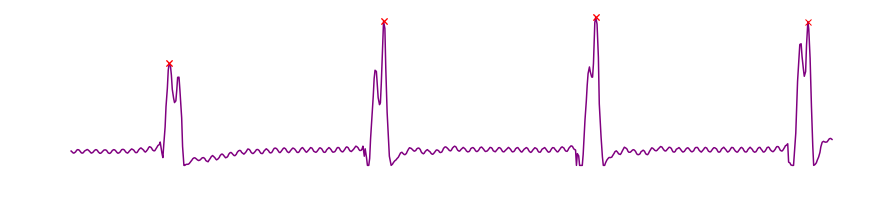

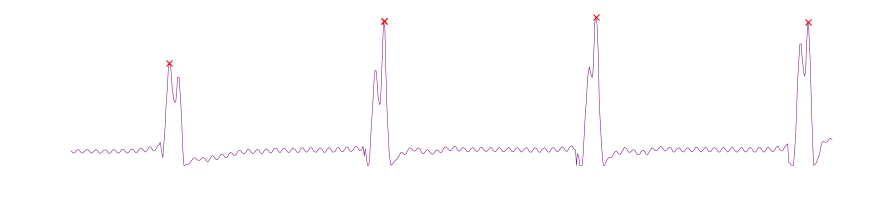

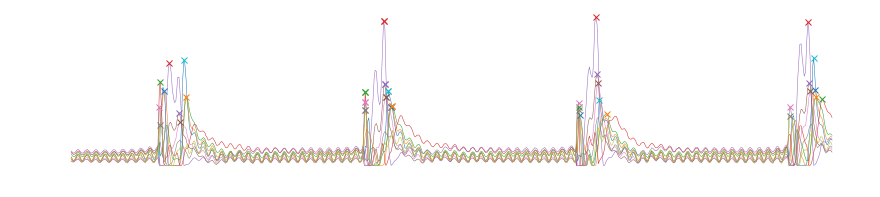

In [8]:
data0 = data[2000:2700,:]
'''find accurate peaks'''

peakind = signal.find_peaks_cwt(data0[:,channelDominate],np.arange(1,100))
peakind0 = peakind
peakind0 = accPeak(peakind,data0,channelDominate,rangeThreshold)
ind = filterNoise(peakind0,data0,channelDominate,offsetNoise)
peakind0 = np.delete(peakind0,ind,None)
plt.figure(figsize=(15,3))
plt.plot(data0[:,0],data0[:,channelDominate],linewidth=1.5,color = 'purple')
plt.plot(data0[peakind0,0], data0[peakind0,channelDominate], 'rx') 
plt.set_cmap('hot')
plt.axis('off')
plt.savefig(outputname4)
plt.show()

'''filter 10% highest and 10% lowest peaks'''
ind = filterPeck(peakind0,data0,channelDominate)
peakind0 = np.delete(peakind0,ind,None)
plt.figure(figsize=(15,3))
plt.plot(data0[:,0],data0[:,channelDominate],linewidth=0.5,color = 'purple')
plt.plot(data0[peakind0,0], data0[peakind0,channelDominate], 'rx') 
plt.set_cmap('hot')
plt.axis('off')
plt.savefig(outputname5)
plt.show()

'''all channels'''
plt.figure(figsize=(15,3))
plt.plot(data0[:,0],data0[:,1:],linewidth=0.5)

peakindTrue = []
for i in range(1, 10):
    peankindTrue[i-1] = accPeak(peakind0, data, i, rangeThreshold)
    plt.plot(data[peakindTrue[i-1],0], data[peakindTrue[i-1],i], 'x')
    
plt.set_cmap('hot')
plt.axis('off')
plt.savefig(outputname6)

In [102]:
def dataProcess(file,startCutThreshold,rangeThreshold,offsetNoise):
    '''startCutThreshold: cut noise in the begining (500)
       rangeThreshold:find maximum peak value in this range (80)
       offsetNoise:noise level above average (20)
    '''
    list_of_lists = []
    with open(file, "r") as f:
        for line in f:
            inner_list = [elt.strip() for elt in line.split('\t')]
            # in alternative, if you need to use the file content as numbers
            # inner_list = [int(elt.strip()) for elt in line.split(',')]
            list_of_lists.append(inner_list)
    print(np.shape(list_of_lists))   
    (a,b) = np.shape(list_of_lists)
    data = np.zeros((a,b))

    for x in range(0,a):
        data[x] = list(map(int,list_of_lists[x]))
    
    '''cut noise in the begining: 500'''
    data = data[startCutThreshold:,:]
    
    '''find channel dominate'''
    index_max = np.argmax(data[:,1:])
    channelDominate = index_max%9+1
    print(channelDominate)
        
    plt.plot(data[:,0],data[:,channelDominate],linewidth=0.5)
    plt.suptitle('Channel Dominate')
    plt.show()
    
    '''find peaks'''
    plt.plot(data[:,0],data[:,channelDominate],linewidth=0.5)
    peakind = signal.find_peaks_cwt(data[:,channelDominate],np.arange(1,300))
    plt.plot(data[peakind,0], data[peakind,channelDominate], 'rx')
    plt.suptitle('Raw Peaks')
    plt.show()
    
    '''find accurate peaks'''
    peakind0 = accPeak(peakind,data,channelDominate,rangeThreshold)
    plt.plot(data[:,0],data[:,channelDominate],linewidth=0.5)
    plt.plot(data[peakind0,0], data[peakind0,channelDominate], 'rx') 
    plt.suptitle('Accurate Peaks')
    plt.show()
        
    '''filter noise'''
    ind = filterNoise(peakind0,data,channelDominate,offsetNoise)
    peakind0 = np.delete(peakind0,ind,None)
    plt.plot(data[:,0],data[:,channelDominate],linewidth=0.5)
    plt.plot(data[peakind0,0], data[peakind0,channelDominate], 'rx') 
    plt.suptitle('Filter Noise')
    plt.show()
    
    '''filter 10% highest and 10% lowest peaks'''
    ind = filterPeck(peakind0,data,channelDominate)
    peakind0 = np.delete(peakind0,ind,None)
    plt.plot(data[:,0],data[:,channelDominate],linewidth=0.5)
    plt.plot(data[peakind0,0], data[peakind0,channelDominate], 'rx')
    plt.suptitle('Filter High & Low')
    plt.show()
    
peakindTrue = []
    for channel in range(1, 10):
        peakindTrue[channel-1] = accPeak(peakind0,data,channel,rangeThreshold)
        plt.plot(data[:,0],data[:,channel],linewidth=0.5)
        plt.plot(data[peakindTrue[channel-1],0], data[peakindTrue[channel-1],channel], 'rx') 
        plt.suptitle('sensor'+str(channel))
        plt.show()
  
    dataProcessed = []
    for i in range(1, 10):
        dataProcessed.append(data[peakindTrue[i-1], i])

    dataProcessed = list(map(list,zip(*dataProcessed)))
    return dataProcessed

def filterNoise(peakind,data,channel,offsetNoise):
    ind = []
    noise = np.mean(data[:,channel])
    for i in range(len(peakind)):
        if data[peakind,channel][i] < noise +offsetNoise:
            ind.append(i)
    return ind

def filterPeck(peakind,data,channel):
    ind = []
    dataPeak = []
    cutNumber = math.ceil(0.1*len(peakind))
    for i in range(len(peakind)):
        dataPeak.append(data[peakind,channel][i])
        
    indexSorted = sorted(enumerate(dataPeak), key=lambda x:x[1])
    for i in range(cutNumber):
        ind.append(indexSorted[i][0])
        ind.append(indexSorted[len(peakind)-1-i][0])
   
    return ind

def accPeak(peakind,data,channel,rangeThreshold):
    peakindTrue = []
    for j in range(peakind.shape[0]):
        maxvalue = data[peakind[j],channel]
        maxind = peakind[j]
        for k in range(max(-rangeThreshold,-peakind[j]),min(rangeThreshold+1,data.shape[0]-1-peakind[j])):
            if data[peakind[j]+k,channel]>maxvalue:
                maxvalue = data[peakind[j]+k,channel]
                maxind = peakind[j]+k
        peakindTrue.append(maxind)
        
    return peakindTrue


(10568, 10)
5


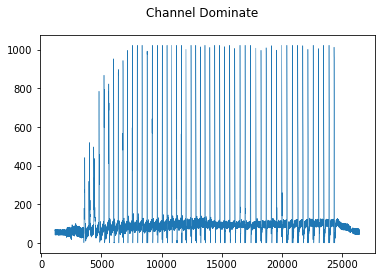

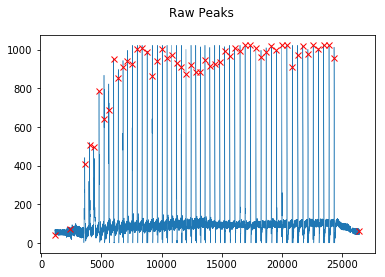

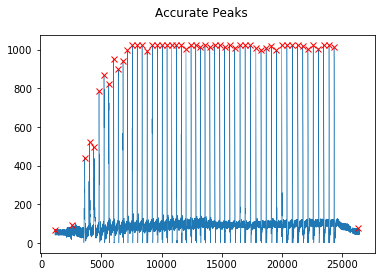

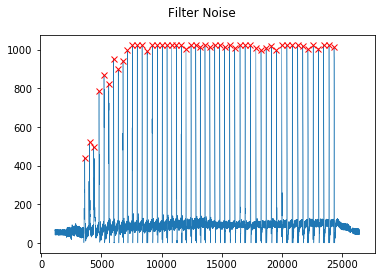

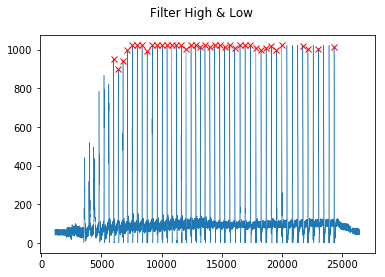

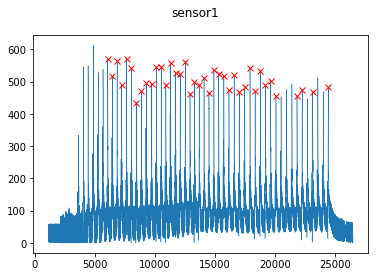

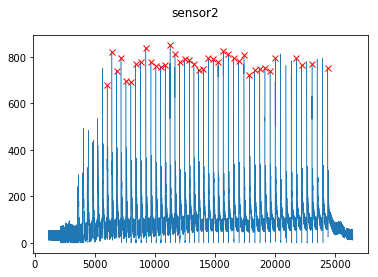

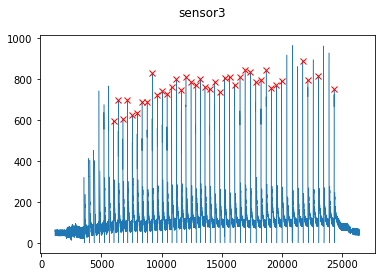

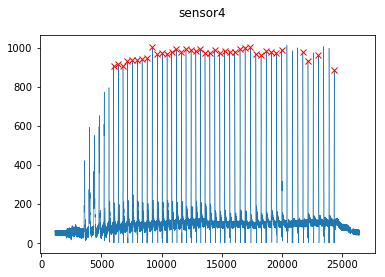

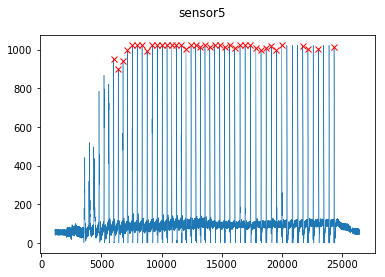

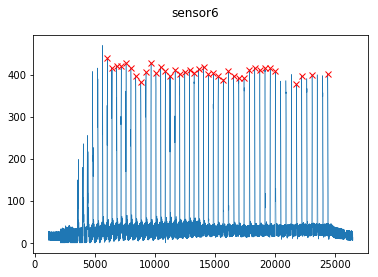

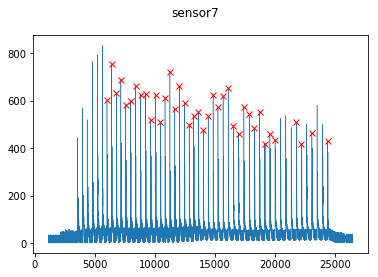

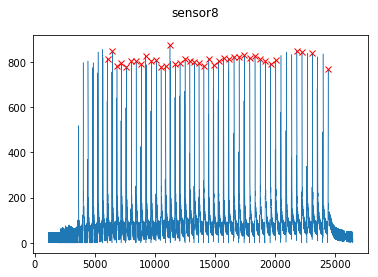

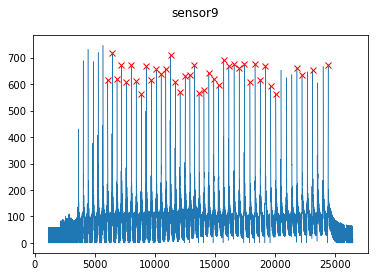

[[571.0, 679.0, 594.0, 905.0, 953.0, 440.0, 603.0, 815.0, 615.0], [518.0, 822.0, 697.0, 914.0, 898.0, 416.0, 753.0, 849.0, 719.0], [565.0, 741.0, 603.0, 907.0, 944.0, 421.0, 633.0, 783.0, 618.0], [489.0, 797.0, 697.0, 931.0, 997.0, 420.0, 689.0, 795.0, 673.0], [571.0, 698.0, 623.0, 934.0, 1023.0, 428.0, 581.0, 780.0, 608.0], [541.0, 692.0, 636.0, 937.0, 1023.0, 417.0, 598.0, 804.0, 673.0], [435.0, 768.0, 689.0, 941.0, 1023.0, 396.0, 661.0, 804.0, 611.0], [470.0, 777.0, 689.0, 945.0, 993.0, 382.0, 626.0, 791.0, 561.0], [496.0, 840.0, 829.0, 1002.0, 1023.0, 406.0, 630.0, 828.0, 668.0], [493.0, 776.0, 723.0, 966.0, 1023.0, 428.0, 518.0, 805.0, 616.0], [544.0, 759.0, 742.0, 973.0, 1023.0, 403.0, 623.0, 807.0, 656.0], [547.0, 758.0, 728.0, 969.0, 1023.0, 418.0, 511.0, 777.0, 640.0], [489.0, 765.0, 759.0, 979.0, 1023.0, 408.0, 612.0, 781.0, 658.0], [557.0, 850.0, 798.0, 993.0, 1023.0, 397.0, 723.0, 874.0, 709.0], [528.0, 812.0, 746.0, 975.0, 1023.0, 412.0, 567.0, 791.0, 609.0], [525.0, 776.0

In [103]:
file = "C:\\Users\\PangTouXian\\Desktop\\gao project\\experiment\\train1\\l8f3.txt"
data = dataProcess(file,500,80,20)
print(data)


